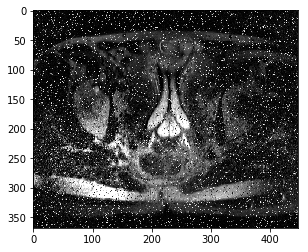

In [109]:
import random as r
import cv2
import numpy as np
import matplotlib.pyplot as plt
import skimage

img=cv2.imread("/home/dic/Desktop/seimens/Patient 387/T2Wcopy/image1.png")

def addRvinGray(image,n): # add random valued impulse noise in grayscale 
    k=0                  # counter variable 
    ih=image.shape[0]    
    iw=image.shape[1]
    noisypixels=(ih*iw*n)/100      # here we calculate the number of pixels to be altered.

    for i in range(ih*iw):
        if k<noisypixels:
                image[r.randrange(0,ih)][r.randrange(0,iw)]=r.randrange(0,256) #access random pixel in the image gives random intensity (0-255)              
                k+=1
        else:
            break
        
    return image
noisy=addRvinGray(img,10)
#noisy = noisy.astype(float)

plt.imshow(noisy.mean(2),cmap='gray')
#cv2.imshow("n.png",noisy)
#cv2.waitkey(0)
plt.show()


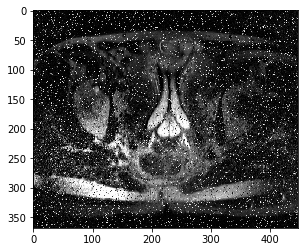

In [131]:
    if img.min() < 0:
        low_clip = -1.
    else:
        low_clip = 0.
    #img=img.mean(2)
    vals = len(np.unique(img))
    vals = int(2 ** np.ceil(np.log2(vals)))

        # Ensure image is exclusively positive
    if low_clip == -1.:
        old_max = img.max()
        img= (img + 1.) / (old_max + 1.)

        # Generating noise for each unique value in image.
    out = np.random.poisson(img * vals) / float(vals)

        # Return image to original range if input was signed
    if low_clip == -1.:
        out = out * (old_max + 1.) - 1.
    plt.imshow(out,cmap='gray')

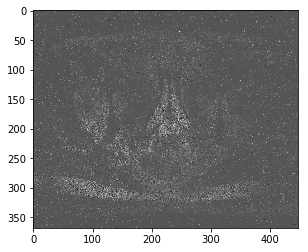

In [132]:
        row,col = img.shape
        gauss = np.random.randn(row,col)
        gauss = gauss.reshape(row,col)        
        noisy_s = img + img * gauss
        plt.imshow(noisy_s,cmap='gray')
        plt.show()

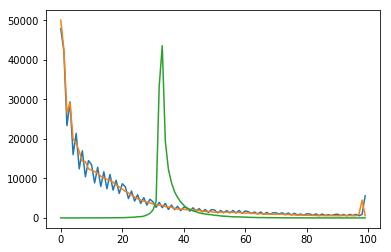

In [137]:
h=np.histogram(noisy,100)
plt.plot(h[0])
h=np.histogram(noisy_p,100)
plt.plot(h[0])
h=np.histogram(noisy_s,100)
plt.plot(h[0])
plt.show()